In [2]:
import sympy

In [3]:
sympy.init_printing()

In [37]:
x, t = sympy.symbols('x t')
T = sympy.Function('T')
q = sympy.Function('q')
kappa = sympy.symbols('kappa', positive=True)
tau_q = sympy.symbols('tau_q', positive=True)
eta, V = sympy.symbols('eta V')
#V = 0

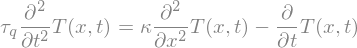

In [5]:
CattaneoSingle = sympy.Eq(tau_q*T(x,t).diff(t, 2), (kappa*T(x,t).diff(x,2) - T(x,t).diff(t)))
CattaneoSingle

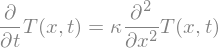

In [6]:
toyheatCElimit = sympy.Eq(T(x,t).diff(t), kappa*T(x,t).diff(x,2))
toyheatCElimit

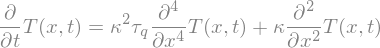

In [7]:
toyheatCE = sympy.Eq(T(x,t).diff(t), kappa*T(x,t).diff(x,2) + kappa**2*tau_q*T(x,t).diff(x,4))
toyheatCE

In [8]:
print("Take toyheatCE and make spreading wave substitution")

Take toyheatCE and make spreading wave substitution


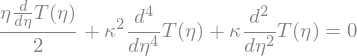

In [9]:
CE_in_eta = sympy.Eq(kappa**2*T(eta).diff(eta,4) + kappa*T(eta).diff(eta,2) + (eta / 2)*T(eta).diff(eta), 0)
CE_in_eta

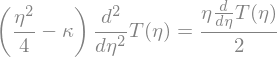

In [10]:
Cat_in_eta = sympy.Eq((eta**2/4 - kappa)*T(eta).diff(eta,2), (eta/2)*T(eta).diff(eta))
# Cat_in_eta

In [48]:
# sympy.dsolve(CE_in_eta, T(eta), ics={T(-sympy.oo): -1, T(sympy.oo): 1,
#                                     T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

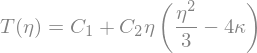

In [49]:
sympy.dsolve(Cat_in_eta, T(eta))#, ics={T(-sympy.oo): -1, T(sympy.oo): 1,
                                 #   T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

In [13]:
print("Cannot solve neither Cattaneo nor CE for spreading wave ansatz. Now try with travelling wave ansatz")

Cannot solve neither Cattaneo nor CE for spreading wave ansatz. Now try with travelling wave ansatz


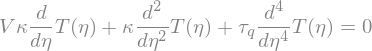

In [14]:
#V = 0 
CE_in_V = sympy.Eq(tau_q*T(eta).diff(eta,4) + kappa*T(eta).diff(eta,2) + V*kappa*T(eta).diff(eta), 0)
CE_in_V

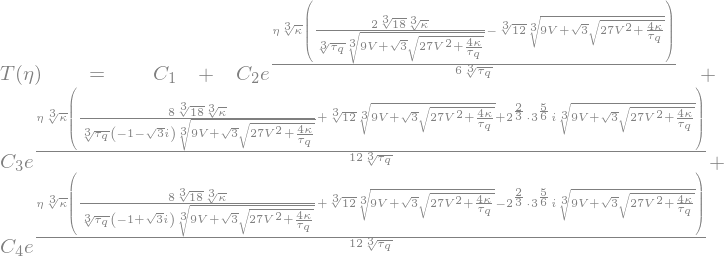

In [57]:
sympy.dsolve(CE_in_V, T(eta))#, ics={T(-sympy.oo): -1, T(sympy.oo): 1,
                              #      T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

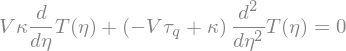

In [17]:
#V = 0 
Cat_in_V = sympy.Eq((kappa - tau_q*V)*T(eta).diff(eta,2) + V*kappa*T(eta).diff(eta), 0)
Cat_in_V

In [56]:
result = sympy.dsolve(Cat_in_V, T(eta))#, ics={T(-sympy.oo): -1, T(sympy.oo): 1})#,
#                                     T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})
#result.subs(kappa,1).subs(tau_q,1)
result.subs(kappa,tau_q).simplify()

In [19]:
print("Seem to be able to solve this for 2 ICS but the answer has infinities in it!? I'm guessing that just means T(eta)"
"is either infinite or zero, depending on the relative sizes/signs of V, tau_q and kappa")

Seem to be able to solve this for 2 ICS but the answer has infinities in it!? I'm guessing that just means T(eta)is either infinite or zero, depending on the relative sizes/signs of V, tau_q and kappa


In [20]:
print("Going to stop here as we don't expect travelling wave solutions for toy heat anyway..."
      "Could perhaps shoot and hope for V=0 but for now I'll go to ToyBulk.")

Going to stop here as we don't expect travelling wave solutions for toy heat anyway...Could perhaps shoot and hope for V=0 but for now I'll go to ToyBulk.


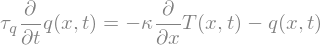

In [40]:
Eq_in_q = sympy.Eq(tau_q*q(x,t).diff(t),(-kappa*T(x,t).diff(x) - q(x,t)))
Eq_in_q

In [ ]:
Eq_in_q_V = 

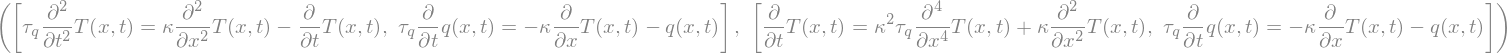

In [43]:
Cat_sys = [CattaneoSingle, Eq_in_q]
CE_sys = [toyheatCE, Eq_in_q]
Cat_sys, CE_sys